In [5]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

![CRISP_DM](../reports/figures/CRISP_DM.png)


# Explorative Data Analysis
* focus is often a visual representation of the data

In [6]:
plotted_data = pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
plotted_data.sort_values('date', ascending=False).head()

,date,Italy,US,Spain,Germany,"Korea, South"
882,2022-06-22,18014202,86636306,12613634,27573585,18305783
881,2022-06-21,17959329,86452232,12613634,27454225,18298341
880,2022-06-20,17896065,86297081,12563399,27334993,18289373
879,2022-06-19,17879160,86246101,12563399,27211896,18280090
878,2022-06-18,17844905,86230982,12563399,27204955,18276552


# Matplotlib Example

<Figure size 432x288 with 0 Axes>

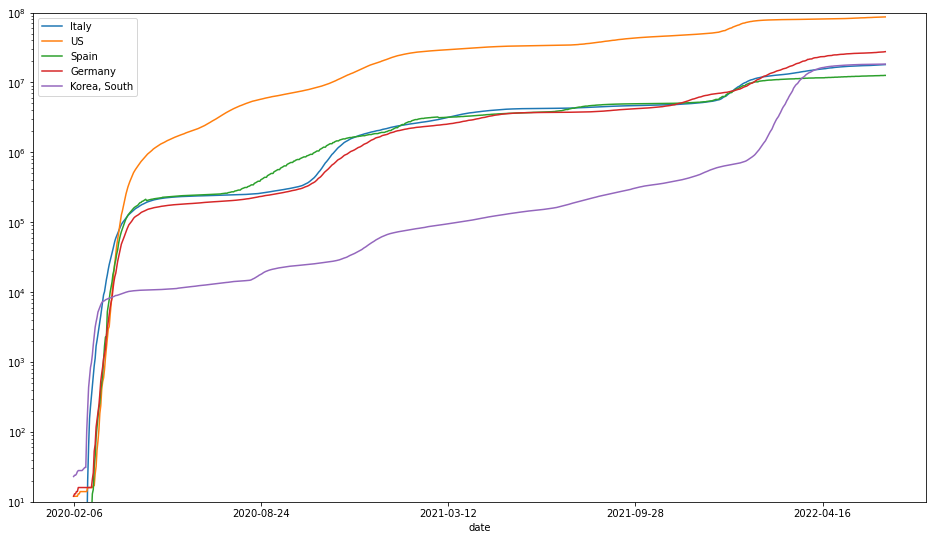

In [7]:
plt.figure();
ax=plotted_data.iloc[15:,:].set_index('date').plot(figsize=(16,9))
plt.ylim(10, 100000000)
ax.set_yscale('log')

# Plot.ly
* Dynamic Plotting

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [9]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=plotted_data.date,
                                y=plotted_data[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(width=1024,height=900,xaxis_title="Time",yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",)
fig.update_yaxes(type="log",range=[1.1,5.5])


fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='browser')

# fig.show()


In [10]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country to dislpay Covid-19 rise'),
    dcc.Dropdown(
        id='country_drop_down',
        options=[{'label':all_countries, 'value': all_countries} for all_countries in country_list # List Comprehension
        #     {'label': 'Italy', 'value': 'Italy'},
        #     {'label': 'US', 'value': 'US'},
        #     {'label': 'Spain', 'value': 'Spain'},
        #     {'label': 'Germany', 'value': 'Germany'},
        #     {'label': 'Korea, South', 'value': 'Korea, South'}
         ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')])

In [11]:

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=plotted_data.date,
                                y=plotted_data[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [13]:
# sever launching
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
